# PROJECT TITLE 

Indian Startup Funding Ecosystem

### OBJECTIVE ###

 Tracking the growth and health of startups contributing to the overall development of the startup ecosystem.Support informed decision-making for investors, policymakers, entrepreneurs, and other stakeholders.Our objective is to analyze funding trends, such as the sectors attracting the most investment, funding rounds frequency, and changes in investor preferences.

### Hypothesis ###

 Null Hypothesis(H0) : Location of  the startup does not affect the funding
 
 Altenative Hypothesis(Ha) : Location of  the startup affects the funding
 

### Research Questions ###

1. At which stage do startups recieve most funds 
2. Which location recorded the highest amount of funding received?
3. How many companies received funding in each year?
4. What is the total amount  funding received each year
5. which company recieved the most funds
 

### libraries importation ###

In [2]:
import pyodbc
from dotenv import dotenv_values 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from re import RegexFlag
from scipy import stats
import statistics as stats
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Data importation (I couldn't connect with the database, so I opted to reading the csv files) ###

## Importing the 2018 dataset ##


Cleaning 2018 Data 

In [3]:
data_2018= pd.read_csv('startup_funding2018.csv')
data_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [4]:
data_2018.shape

(526, 6)

In [5]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


check for null values (there are no null values)

In [6]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

checking for duplicated rows and dropping if any

In [7]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [8]:
data_2018.drop_duplicates(inplace=True)

Rename the columns 

In [9]:
data_2018.rename(columns={'Amount': 'Amount($)', 'Location': 'HeadQuarter', 'Round/Series': 'Stage'}, inplace=True)

Add a year tag to the data=2018

In [10]:
data_2018['Funding Year']=2018
data_2018.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018


## Cleaning the 2019 Data ##

Importing 2019 dataset

In [11]:
data_2019=pd.read_csv('startup_funding2019.csv')
data_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [12]:
data_2019.shape

(89, 9)

In [13]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


Check for null values

In [14]:
data_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

checking for duplicated rows

In [15]:
data_2019[data_2019.duplicated(keep=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


Rename the columns

In [16]:
data_2019.rename(columns={'Company/Brand': 'Company Name', 'What it does': 'About Company', 'Sector':'Industry'}, inplace=True)

Add a year tag to the data= 2019

In [17]:
data_2019['Funding Year']=2019

Concatinating 2018 and 2019 data 

In [18]:
data_18_19 = pd.concat([data_2018, data_2019], axis=0).reset_index(drop=True)
data_18_19.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN


In [19]:
data_18_19.shape

(614, 10)

## Cleaning the 2020 Data ##

Importing the dataset

In [20]:
data_2020=pd.read_csv('startup_funding2020.csv')
data_2020.head(2)

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN


In [21]:
data_2020.shape

(1055, 11)

In [22]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1055 non-null   int64  
 1   Company_Brand  1055 non-null   object 
 2   Founded        842 non-null    float64
 3   HeadQuarter    961 non-null    object 
 4   Sector         1042 non-null   object 
 5   What_it_does   1055 non-null   object 
 6   Founders       1043 non-null   object 
 7   Investor       1017 non-null   object 
 8   Amount         801 non-null    float64
 9   Stage          591 non-null    object 
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


Dropping unnamed and column10 columns because they are not useful in anyway while analysing the data

In [23]:
data_2020 =data_2020.drop('Unnamed: 0',axis=1)
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN


In [24]:
data_2020 =data_2020.drop('column10',axis=1)
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed


In [25]:
data_2020[data_2020.duplicated(keep=False)]


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,NaN
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,NaN


In [26]:
data_2020.drop_duplicates(inplace=True)

Rename the columns 

In [27]:
data_2020.rename(columns={'Company_Brand': 'Company Name', 'Sector': 'Industry', 'What_it_does':'About Company', 'Amount':'Amount($)'},inplace=True)
data_2020.head()

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN


In [28]:
data_2020['Funding Year']=2020

In [29]:
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


## Cleaning 2021 Data ##

Import 2021 dataset

In [30]:
data_2021=pd.read_csv('startup_funding2021.csv')
data_2021.head(2)

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


In [31]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1209 non-null   int64  
 1   Company_Brand  1209 non-null   object 
 2   Founded        1208 non-null   float64
 3   HeadQuarter    1208 non-null   object 
 4   Sector         1209 non-null   object 
 5   What_it_does   1209 non-null   object 
 6   Founders       1205 non-null   object 
 7   Investor       1147 non-null   object 
 8   Amount         1206 non-null   object 
 9   Stage          781 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [32]:
data_2021.isnull().sum()

Unnamed: 0         0
Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

Dropping the unnamed because it's not in any way useful

In [33]:
data_2021 =data_2021.drop('Unnamed: 0',axis=1)
data_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


Rename the columns 

In [34]:
data_2021.rename(columns={'Company_Brand': 'Company Name', 'Sector': 'Industry', 'What_it_does':'About Company', 'Amount':'Amount($)'},inplace=True)


In [35]:
data_2021['Funding Year']=2021

Concatinating 2020 and 2021 dataset

In [36]:
data_20_21 = pd.concat([data_2020, data_2021], axis=0).reset_index(drop=True)
data_20_21.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


In [37]:
data_20_21.shape

(2261, 10)

Concatinating all datasets 

In [38]:
data=pd.concat([data_18_19, data_20_21], axis=0).reset_index(drop=True)
data.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN


In [39]:
data.shape

(2875, 10)

The final new combined dataset (data) is what we are going to use hereafter. 
Dropping the columns that we are not going to use for our analysis 

In [40]:
data = data.drop(columns={'About Company','Founders', 'Investor'}, axis=1)
data.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN


Inspecting the columns

In [41]:
#Industry
data['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [42]:
# maintianing first word before comma in the industry column
data['Industry'] = data['Industry'].apply(str)
data['Industry'] = data['Industry'].str.split(',').str[0]
data['Industry'] = data['Industry'].replace("'","",regex=True)

In [43]:
data['Industry']= data['Industry'].replace('—', 'unknown')

In [44]:
data.loc[data["Industry"] == 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded
2766,Sochcast,Sochcast is an Audio experiences company that ...,NaN,NaN,Online Media\t#REF!,2021,2020.0


In [45]:
values_to_drop= ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']
data = data[~data['Industry'].isin(values_to_drop)]

In [46]:
data['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

Regrouping the industry column values into broader groups

    1:Technology & Software: Including categories like AI startup, IoT startup, SaaS startup, Tech company, etc.
    2:Finance & Banking: Encompassing Finance company, Renewable player, Blockchain startup, etc.
    3:E-Commerce & Marketplace: Covering Crowdfunding, Delivery Service, B2B Supply Chain, Retail startup, etc.
    4:Healthcare & Wellness: Encompassing Biopharma, Child Care, HealthTech, FemTech, etc.
    5:Manufacturing & Industrial: Including Battery, Electric Vehicle, Solar Monitoring Company, etc.
    6:Media & Entertainment: Covering Games, Video sharing platform, Video streaming platform, Advertisement, etc.
    7:Consulting & Services: Including HR tech, Legal tech, Marketing company, Supply chain platform, etc.
    8:Automotive & Transportation: Encompassing automotive_transportation, Bike Rental, etc.
    9:Real Estate & Property: Covering Real Estate, Co-working Startup, Real estate, etc.
    10:Other Categories: For industries that may not directly fit into the above groups.

In [47]:
# Function to categorize words based on substrings

def categorize_industry(industry):
    industry = industry.lower()
    if 'tech' in industry or 'software' in industry or 'internet' in industry or 'information technology' in industry:
        return 'Technology'
    elif 'finance' in industry or 'banking' in industry or 'account' in industry or 'insurance' in industry or 'credit' in industry or 'wealth management' in industry:
        return 'Finance $ Banking'
    elif 'health' in industry or 'medical' in industry or 'biotechnology' in industry or 'healthcare' in industry or 'well' in industry:
        return 'Healthcare'
    elif 'food' in industry or 'beverage' in industry or 'restaurant' in industry or 'agriculture' in industry:
        return 'Food & Agriculture'
    elif 'auto' in industry or 'transport' in industry or 'logistic' in industry:
        return 'Autommotive $ Transportation'
    elif 'estate' in industry or 'property' in industry:
        return 'Real Estate $ Property'
    elif 'consult' in industry or 'services' in industry:
        return 'Consulting & Services'
    elif 'commerce' in industry or 'market' in industry:
        return 'E-Commerce & Marketplace'
    else:
        return 'Other'
# Apply the categorization function to the 'industry' column
data['category'] = data['Industry'].apply(categorize_industry)

# Display the updated DataFrame
data.head(10)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India",2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Seed,1600000,"Bengaluru, Karnataka, India",2018,NaN,Other
6,Tripshelf,Internet,Seed,"₹16,000,000","Kalkaji, Delhi, India",2018,NaN,Technology
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",2018,NaN,E-Commerce & Marketplace
8,Freightwalla,Information Services,Seed,—,"Mumbai, Maharashtra, India",2018,NaN,Consulting & Services
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",2018,NaN,Other


In [48]:
#HeadQuarter
data['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [49]:
# maintianing first word before comma in the HeadQuarter column
data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'] = data['HeadQuarter'].str.split(',').str[0]
data['HeadQuarter'] = data['HeadQuarter'].replace("'","",regex=True)

In [50]:
data['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [51]:
data.loc[data['HeadQuarter']== 'Food & Beverages']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
1907,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,2021,2020.0,Other
1921,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,2021,2020.0,Other


In [52]:
data.loc[data["HeadQuarter"] == 'Computer Games']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
1764,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,2021,2020.0,Other
1777,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,2021,2020.0,Other


In [82]:
values_to_drop = ['Small Towns', 'Computer Games', 'Food & Beverages', 'Pharmaceuticals\t#REF! ,Online Media\t#REF!', 'Information Technology & Services']

# Drop rows with specified values in the 'headquarters' column
data = data[~data['HeadQuarter'].isin(values_to_drop)]

In [83]:
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'nan',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irv

In [54]:
#Stage
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

Assumptions made when dealing with the stage column 
-Regrouping the stages into 5 groups 

Early Stage: Pre-Seed,Seed,Pre series A,Seed funding,Seed fund,Seed round,Pre-series A,Pre-seed Round, Pre seed Round, Pre series A1,Pre-series C,Series A-1

Angel and Grants:Angel,Grant

Series A to Series H: Series A,Series B,Series C,Series D,Series E,Series F,Series G,Series H,Series B+,Post series A,Series D1

Later Stage:Venture -,Private Equity,Debt Financing,Post-IPO Debt,Post-IPO Equity,Corporate Round,Non-equity Assistance,Funding Round,Fresh funding,Secondary Market, PE
    
Unknown = Undisclosed,Venture - Series Unknown, nan, .startswith https,


In [55]:


def group_funding_stages(stage):
    if stage in ['Pre-Seed', 'Seed','Early seed','Series I','Seed Round', 'Pre series A', 'Seed funding', 'Seed fund', 'Seed round', 'Pre-series A','Pre-series A1',
                 'Pre-seed Round', 'Pre seed Round', 'Pre series A1', 'Pre-series C', 'Series A-1','Pre-seed', 'Pre-series', 'Pre- series A', 'Pre-Series B', 'Seed A', 'Seed Funding', 'Seed Round & Series A',
                'Pre Series A','Pre seed round','Pre series B', 'Pre series C', 'Seed Investment', 'Seed+','Pre-series B']:
        return 'Early Stage'
    
    elif stage in ['Angel', 'Grant', 'Angel Round']:
        return 'Angel and Grants'
    
    elif stage in ['Series A','Seies A', 'Series A2', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
                   'Series B+', 'Post series A', 'Series D1','Series B2', 'Series E2', 'Series C, D', 'Series F2', 'Series F1', 'Series A+', 'Series B3']:
        return 'Series A to Series H'
    
    elif stage in ['Venture -', 'Private Equity','Debt' ,'Debt Financing', 'Post-IPO Debt', 'Post-IPO Equity',
                   'Corporate Round', 'Non-equity Assistance', 'Funding Round', 'Fresh funding', 'Secondary Market',
                   'PE','Bridge', 'Edge', 'Bridge Round', 'Mid series']:
        return 'Later Stage'
    
    elif stage in ['Undisclosed','Venture - Series Unknown','https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']:
        return 'unknown'

    else:
        return stage

# Apply the function to the 'Stage' column
data['Stage'] = data['Stage'].apply(group_funding_stages)

# Display the updated DataFrame
data.head()


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,"₹40,000,000",Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,"₹65,000,000",Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,—,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [56]:
data["Stage"].unique()

array(['Early Stage', 'Series A to Series H', 'Angel and Grants',
       'Later Stage', 'unknown', nan, '$300000', '$6000000', '$1000000'],
      dtype=object)

We have 3 'amount' values in the stage column so instead of changing them to null values, we checked the rows where the values were 

In [57]:
data[data['Stage']=='$6000000']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2340,MYRE Capital,Commercial Real Estate,$6000000,NaN,Mumbai,2021,2020.0,Real Estate $ Property


Stage and amount values are interchanged in this particular row, and the other 2 ,so we move the value to the amount column and replace the stage with an unknown value.

In [58]:
data.loc[data["Company Name"] == "MYRE Capital", ["Amount($)", "Stage"]] = ["6000000",'unknown']
data.loc[data["Company Name"] == "MYRE Capital"]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2340,MYRE Capital,Commercial Real Estate,unknown,6000000,Mumbai,2021,2020.0,Real Estate $ Property


In [59]:
data[data['Stage']=='$300000']



,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2204,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,2021,2020.0,Technology
2217,BHyve,Human Resources,$300000,"ITO Angel Network, LetsVenture",Mumbai,2021,2020.0,Other


In [60]:
data.loc[data["Company Name"] == "Little Leap", ["Amount($)", "Stage"]] = ["$300000",'unknown']
data.loc[data["Company Name"] == "Little Leap"]

data.loc[data["Company Name"] == "BHyve", ["Amount($)", "Stage"]] = ["$300000",'unknown']
data.loc[data["Company Name"] == "BHyve"]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2217,BHyve,Human Resources,unknown,$300000,Mumbai,2021,2020.0,Other


In [61]:

data[data['Stage']=='$1000000']

data.loc[data["Company Name"] == "Saarthi Pedagogy", ["Amount($)", "Stage"]] = ["$1000000",'unknown']
data.loc[data["Company Name"] == "Saarthi Pedagogy"]


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2343,Saarthi Pedagogy,EdTech,unknown,$1000000,Ahmadabad,2021,2015.0,Technology


 Removing the currency signs, replacing the empty values '-' with 0.Assuming all the other values are in dollars except the ones that have been recorded in 'rupees' (Convert the values in rupees to dollars and the empty values to 0 ) now all the values are in dollars. Then converting the amount column to a float (it is stored as an object)

In [62]:
#Amount
def convert_to_dollars(value, conversion_rate):
    try:
        if isinstance(value, str):
            if '₹' in value:
                # Extract the numeric part and convert to float
                amount_in_rupees = float(value.replace('₹', '').replace(',', ''))
                
                # Convert to dollars using the conversion rate
                amount_in_dollars = amount_in_rupees * conversion_rate
                return amount_in_dollars
            
            elif '$' in value:
                # If already in dollars, remove commas and return as float
                return float(value.replace(',', '').replace('$', ''))
            elif '' in value:
                return value
        
        # If it's not a string with currency symbols, return the original value
        return value
    except ValueError:
        
        return None

# Assuming 'data' is a DataFrame with a column 'Amount($)' to convert
conversion_rate = 0.0146

# Apply the function to the 'Amount($)' column
data['Amount($)'] = data['Amount($)'].apply(lambda x: convert_to_dollars(x, conversion_rate))

# Display the updated DataFrame
data.head()


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,—,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [63]:


data["Amount($)"] = data["Amount($)"].apply(str)




data["Amount($)"].replace("—", 0, inplace = True, regex=True)
data["Amount($)"].replace("Undisclosed", 0, inplace = True, regex=True)
data["Amount($)"].replace("$undisclosed", 0, inplace = True, regex=True)
data["Amount($)"].replace("undisclosed",0,inplace = True, regex=True)

data["Amount($)"].replace("Series C", 0,inplace = True, regex=True)
data["Amount($)"].replace("Seed",0,inplace = True, regex=True)
data["Amount($)"].replace("ah! Ventures",0,inplace = True, regex=True)
data["Amount($)"].replace("Pre-series A",0,inplace = True, regex=True)
data["Amount($)"].replace("ITO Angel Network LetsVenture",0,inplace = True, regex=True)



data["Amount($)"] = data["Amount($)"].apply(lambda x: (str(x)))


data.head()

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [64]:
data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce').astype('float')

# Display the cleaned DataFrame
data.head(2)


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000.0,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture


In [65]:
data['Amount($)'].isnull().sum()

356

In [66]:
data['Amount($)'].unique()

array([2.5000000e+05, 5.8400000e+05, 9.4900000e+05, 2.0000000e+06,
       0.0000000e+00, 1.6000000e+06, 2.3360000e+05, 7.3000000e+05,
       1.4600000e+06, 1.5000000e+05, 1.1000000e+06, 7.3000000e+03,
       6.0000000e+06, 6.5000000e+05, 5.1100000e+05, 9.3440000e+05,
       2.9200000e+05, 1.0000000e+06, 5.0000000e+06, 4.0000000e+06,
       4.3800000e+05, 2.8000000e+06, 1.7000000e+06, 1.3000000e+06,
       7.3000000e+04, 1.8250000e+05, 2.1900000e+05, 5.0000000e+05,
       1.5184000e+06, 6.5700000e+05, 1.3400000e+07, 3.6500000e+05,
       3.8544000e+05, 1.1680000e+05, 8.7600000e+02, 9.0000000e+06,
       1.0000000e+05, 2.0000000e+04, 1.2000000e+05, 4.9640000e+05,
       4.9932000e+06, 1.4314500e+05, 8.7600000e+06, 7.4200000e+08,
       1.4600000e+07, 2.9200000e+07, 3.9800000e+06, 1.0000000e+04,
       1.4600000e+03, 3.6500000e+06, 1.0000000e+09, 7.0000000e+06,
       3.5000000e+07, 8.0300000e+06, 2.8500000e+07, 3.5040000e+06,
       1.7520000e+06, 2.4000000e+06, 3.0000000e+07, 3.6500000e

In [67]:
data['Amount($)'] = data['Amount($)'].apply(lambda x: f'{x:.2f}')

In [68]:
data['Amount($)'].unique()

array(['250000.00', '584000.00', '949000.00', '2000000.00', '0.00',
       '1600000.00', '233600.00', '730000.00', '1460000.00', '150000.00',
       '1100000.00', '7300.00', '6000000.00', '650000.00', '511000.00',
       '934400.00', '292000.00', '1000000.00', '5000000.00', '4000000.00',
       '438000.00', '2800000.00', '1700000.00', '1300000.00', '73000.00',
       '182500.00', '219000.00', '500000.00', '1518400.00', '657000.00',
       '13400000.00', '365000.00', '385440.00', '116800.00', '876.00',
       '9000000.00', '100000.00', '20000.00', '120000.00', '496400.00',
       '4993200.00', '143145.00', '8760000.00', '742000000.00',
       '14600000.00', '29200000.00', '3980000.00', '10000.00', '1460.00',
       '3650000.00', '1000000000.00', '7000000.00', '35000000.00',
       '8030000.00', '28500000.00', '3504000.00', '1752000.00',
       '2400000.00', '30000000.00', '36500000.00', '23000000.00',
       '11000000.00', '642400.00', '3240000.00', '876000.00',
       '540000000.00', '

In [69]:
data['Amount($)'] = data['Amount($)'].astype(float)

In [70]:
data['Amount($)'].dtype

dtype('float64')

In [71]:
#Founded 
data['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [72]:
#Company Name
data['Company Name']

0       TheCollegeFever
1       Happy Cow Dairy
2            MyLoanCare
3           PayMe India
4              Eunimart
             ...       
2870           Gigforce
2871             Vahdam
2872       Leap Finance
2873       CollegeDekho
2874             WeRize
Name: Company Name, Length: 2868, dtype: object

Check for duplicated rows and drop if any

In [73]:
data[data.duplicated(keep=False)]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
827,Genius Teacher,Edtech,NaN,2000000.0,Mumbai,2020,2016.0,Technology
845,Genius Teacher,Edtech,NaN,2000000.0,Mumbai,2020,2016.0,Technology
1382,Capital Float,Fintech,NaN,15000000.0,Bangalore,2020,2013.0,Technology
1513,Yolo,Transport,Early Stage,600000.0,Gurugram,2020,2019.0,Autommotive $ Transportation
1546,Byju,Edtech,NaN,200000000.0,nan,2020,2011.0,Technology
1575,Yolo,Transport,Early Stage,600000.0,Gurugram,2020,2019.0,Autommotive $ Transportation
1625,Capital Float,Fintech,NaN,15000000.0,Bangalore,2020,2013.0,Technology
1646,Byju,Edtech,NaN,200000000.0,nan,2020,2011.0,Technology
1760,Curefoods,Food & Beverages,NaN,13000000.0,Bangalore,2021,2020.0,Food & Agriculture
1762,Bewakoof,Apparel & Fashion,NaN,8000000.0,Mumbai,2021,2012.0,Other


In [74]:
data.drop_duplicates(inplace=True)

In [75]:
data.shape

(2844, 8)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 0 to 2874
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2844 non-null   object 
 1   Industry      2844 non-null   object 
 2   Stage         1920 non-null   object 
 3   Amount($)     2490 non-null   float64
 4   HeadQuarter   2844 non-null   object 
 5   Funding Year  2844 non-null   int64  
 6   Founded       2076 non-null   float64
 7   category      2844 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 200.0+ KB


In [77]:
data.isnull().sum()

Company Name      0
Industry          0
Stage           924
Amount($)       354
HeadQuarter       0
Funding Year      0
Founded         768
category          0
dtype: int64

Dealing with the null values

In [78]:
data['Stage'].fillna('unknown', inplace=True)

In [79]:
data['Founded'].fillna('unknown', inplace=True)

In [84]:
data['Amount($)'].fillna(data['Amount($)'].mean(), inplace=True)

In [106]:
data['HeadQuarter'].fillna('unknown', inplace=True)

In [85]:
data['HeadQuarter'].replace('nan' , 'unknown' , inplace= True)

In [86]:
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'unknown',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [87]:

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company Name,2844,2210,BharatPe,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,2844,592,FinTech,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2844,5,Early Stage,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2844.0,NaN,NaN,NaN,112089253.004418,3104284475.046999,0.0,730000.0,3650000.0,30000000.0,150000000000.0
HeadQuarter,2844,127,Bangalore,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding Year,2844.0,NaN,NaN,NaN,2020.01512,1.088802,2018.0,2020.0,2020.0,2021.0,2021.0
Founded,2844,35,unknown,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,2844,9,Other,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),2844.00,112089253.00,3104284475.05,0.00,730000.00,3650000.00,30000000.00,150000000000.00
Funding Year,2844.00,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00


In [90]:
data.isnull().sum()

Company Name    0
Industry        0
Stage           0
Amount($)       0
HeadQuarter     0
Funding Year    0
Founded         0
category        0
dtype: int64

# REASEARCH QUESTIONS

1. At which stage do startups recieve most funds 

In [91]:
stg_w_most_fnd= data.groupby('Stage')['Amount($)'].sum().reset_index()
stg_w_most_fnd.sort_values(['Amount($)'],ascending=False, inplace=True)
stg_w_most_fnd

,Stage,Amount($)
2,Later Stage,154303788159.01
4,unknown,121445059139.86
3,Series A to Series H,24993922292.05
1,Early Stage,17687900714.62
0,Angel and Grants,351165239.01


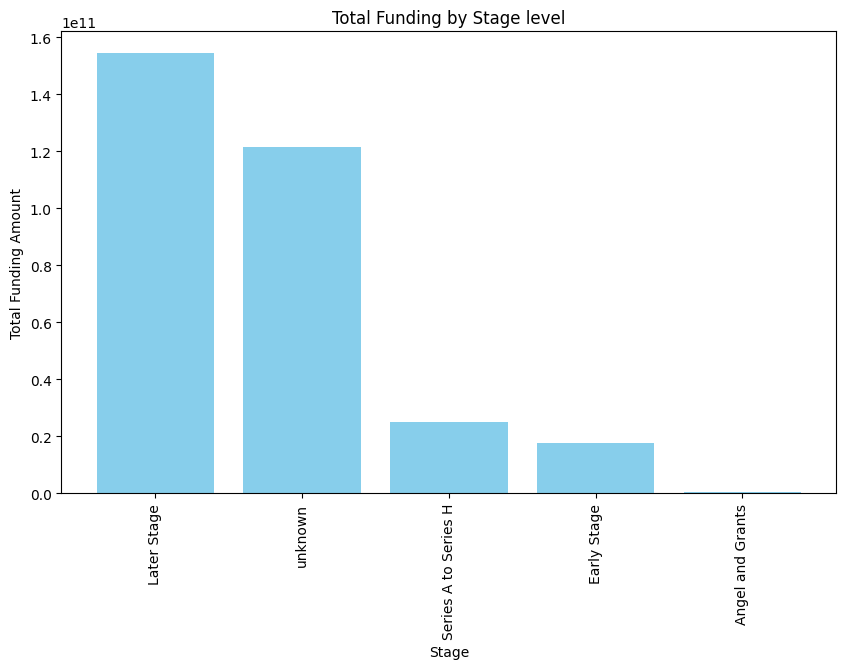

In [92]:

plt.figure(figsize=(10, 6))
plt.bar(stg_w_most_fnd['Stage'], stg_w_most_fnd['Amount($)'], color='skyblue')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding by Stage level')
plt.xticks(rotation=90)
plt.show()


2. Which location recorded the highest amount of funding received?

In [93]:
hq_highest_amt=data.groupby('HeadQuarter')['Amount($)'].sum().reset_index()
hq_highest_amt.sort_values(['Amount($)'], ascending = False,inplace=True)

In [94]:
top_5=hq_highest_amt.head()
top_5

,HeadQuarter,Amount($)
71,Mumbai,237072502121.25
9,Bangalore,35398245969.46
40,Gurugram,8574041331.12
74,New Delhi,5881484606.10
126,unknown,3908620601.08


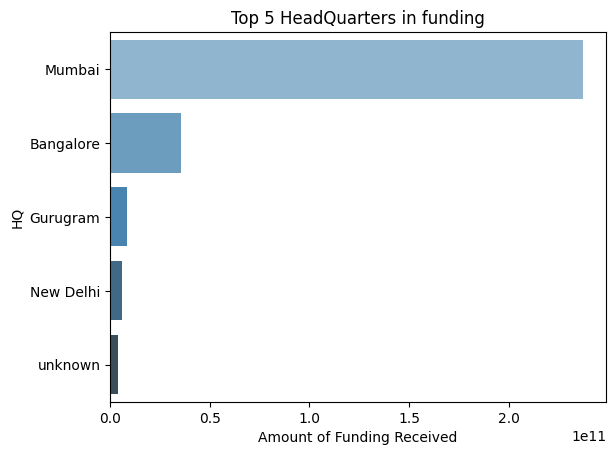

In [95]:
plt.title('Top 5 HeadQuarters in funding')
sns.barplot(y=top_5['HeadQuarter'],x=top_5['Amount($)'],palette='Blues_d')
plt.ylabel('HQ')
plt.xlabel('Amount of Funding Received')
plt.show()

3. How many companies received funding in each year?

In [96]:
year =data.groupby(['Funding Year']).count().reset_index()
year

,Funding Year,Company Name,Industry,Stage,Amount($),HeadQuarter,Founded,category
0,2018,525,525,525,525,525,525,525
1,2019,89,89,89,89,89,89,89
2,2020,1048,1048,1048,1048,1048,1048,1048
3,2021,1182,1182,1182,1182,1182,1182,1182


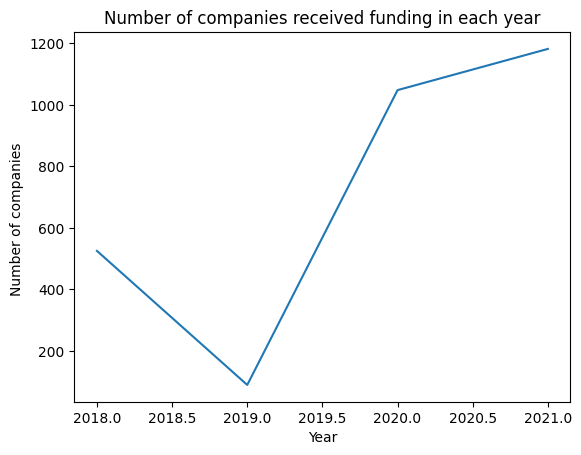

In [97]:
plt.xlabel('Year')
plt.ylabel('Number of companies ')
plt.title('Number of companies received funding in each year')
sns.lineplot(y=year['Company Name'],x=year['Funding Year'])

plt.show()

4. What is the total amount  funding received each year

In [98]:
amtby_year=data.groupby(['Funding Year']).sum(numeric_only=True).reset_index()
amtby_year

,Funding Year,Amount($)
0,2018,6641523177.00
1,2019,3336433200.00
2,2020,118187799614.12
3,2021,190616079553.45


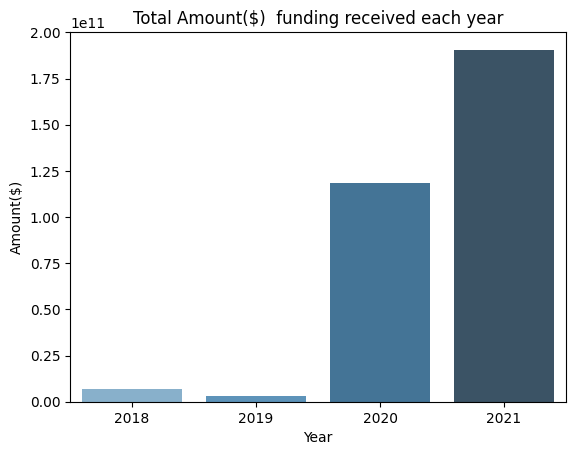

In [99]:
plt.title('Total Amount($)  funding received each year')
ax=sns.barplot(y=amtby_year['Amount($)'],x=amtby_year['Funding Year'],palette='Blues_d')
ax.set(xlabel='Year',ylabel='Amount($)')
plt.show()

5. which company recieved the most funds

In [100]:
companies=data.groupby('Company Name')['Amount($)'].sum().reset_index()
companies.sort_values(['Amount($)'], ascending=False,inplace=True)
companies

,Company Name,Amount($)
70,Alteria Capital,150000000000.00
1554,Reliance Retail Ventures Ltd,70000000000.00
1724,Snowflake,3000000000.00
1551,Reliance,2200000000.00
1814,Swiggy,1956000000.00
...,...,...
1778,Strom Motors,0.00
1781,Stumagz,0.00
763,Go Payments,0.00
1817,Syncremedies Healthcare Pvt Ltd,0.00


In [101]:
top5= companies.head()
top5

,Company Name,Amount($)
70,Alteria Capital,150000000000.00
1554,Reliance Retail Ventures Ltd,70000000000.00
1724,Snowflake,3000000000.00
1551,Reliance,2200000000.00
1814,Swiggy,1956000000.00


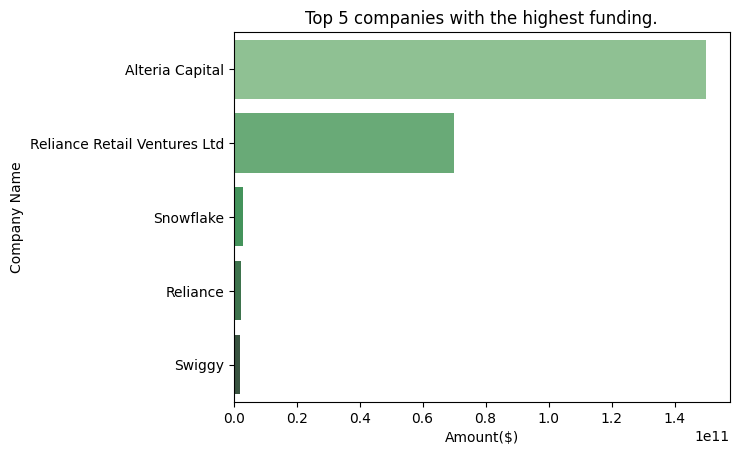

In [102]:

plt.title('Total Amount($) received funding each year')
sns.barplot(y=top5['Company Name'],x=top5['Amount($)'],palette='Greens_d')
ax.set(xlabel='Amount($)',ylabel='Companies')
plt.title('Top 5 companies with the highest funding.')
plt.show()

### Testing hypothesis

Null Hypothesis(H0) : Location of  the startup does not affect the funding
 
Altenative Hypothesis(Ha) : Location of  the startup affects the funding
 

In [103]:



# Filter data for each location
location_a_funding = data[data['HeadQuarter'] == 'Mumbai']['Amount($)']
location_b_funding = data[data['HeadQuarter'] == 'Singapore']['Amount($)']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(location_a_funding, location_b_funding, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Location of the startup affects the funding")
else:
    print("Fail to reject Null Hypothesis (H0): Location of the startup does not affect the funding")


T-statistic: 1.4237297749436613
P-value: 0.15519389881160833
Fail to reject Null Hypothesis (H0): Location of the startup does not affect the funding


### Conclusion


After the analysis, we observed that in the Indian Ecosystem ,the top stage  with most funding is the Later stage , with $154.03 billion.This means that because companies in the later stages are more established, often with a clearer product-market fit and a demonstrated ability to generate revenue, is when they are funded the most.

In terms of locations, Mumbai is the top location with the highest funding amount of $237.16 billion, followed by Bangalore with $36.33 billion. Other locations include Gurugram, New Delhi, and California, all of which received different amounts of funding. 

We  fail to reject the **Null Hypothesis** and reject the Alternate Hypothesis.
Location of the startup does not affect the funding 

**Recommendations**

We advise our team to venture into top companies that are : **Alteria Capital, Reliance Retail Ventures Ltd,Snowflake,Reliance,Swiggy**	Companies that are in the later funding stages and that  the  Locations of the HeadQuarter do not matter whatsoever.The industry you are in is a better predictor of your ability to attract funding, not your location.